<a href="https://colab.research.google.com/github/Shivanireddy102/AM/blob/main/prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np


In [ ]:
# Load the data
data = pd.read_csv('/content/consumer_electronics_sales_data.csv')
print(data.head())


   ProductID ProductCategory  ProductBrand  ProductPrice  CustomerAge  \
0       5874     Smartphones  Other Brands    312.949668           18   
1       5875   Smart Watches       Samsung    980.389404           35   
2       5876         Tablets       Samsung   2606.718293           63   
3       5877     Smartphones       Samsung    870.395450           63   
4       5878         Tablets          Sony   1798.955875           57   

   CustomerGender  PurchaseFrequency  CustomerSatisfaction  PurchaseIntent  
0               0                  2                     1               0  
1               1                  7                     2               1  
2               0                  1                     5               1  
3               1                 10                     3               1  
4               0                 17                     3               0  


In [ ]:
# Check for missing values in the dataset
null_values = data.isnull().sum()
print(null_values)


ProductID               0
ProductCategory         0
ProductBrand            0
ProductPrice            0
CustomerAge             0
CustomerGender          0
PurchaseFrequency       0
CustomerSatisfaction    0
PurchaseIntent          0
dtype: int64


In [ ]:
print(data.head())

   ProductID  ProductPrice  CustomerAge  PurchaseFrequency  \
0       5874    312.949668           18                  2   
1       5875    980.389404           35                  7   
2       5876   2606.718293           63                  1   
3       5877    870.395450           63                 10   
4       5878   1798.955875           57                 17   

   CustomerSatisfaction  PurchaseIntent  ProductCategory_Laptops  \
0                     1               0                    False   
1                     2               1                    False   
2                     5               1                    False   
3                     3               1                    False   
4                     3               0                    False   

   ProductCategory_Smart Watches  ProductCategory_Smartphones  \
0                          False                         True   
1                           True                        False   
2                      

In [ ]:
#Splitting the data
from sklearn.model_selection import train_test_split
X = data.drop('PurchaseIntent', axis=1)
y = data['PurchaseIntent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(7200, 14) (1800, 14) (7200,) (1800,)


In [ ]:
#train model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred_class = clf.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Classification Accuracy: {accuracy}")


Classification Accuracy: 0.955


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[755  38]
 [ 43 964]]


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_class)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       793
           1       0.96      0.96      0.96      1007

    accuracy                           0.95      1800
   macro avg       0.95      0.95      0.95      1800
weighted avg       0.96      0.95      0.96      1800



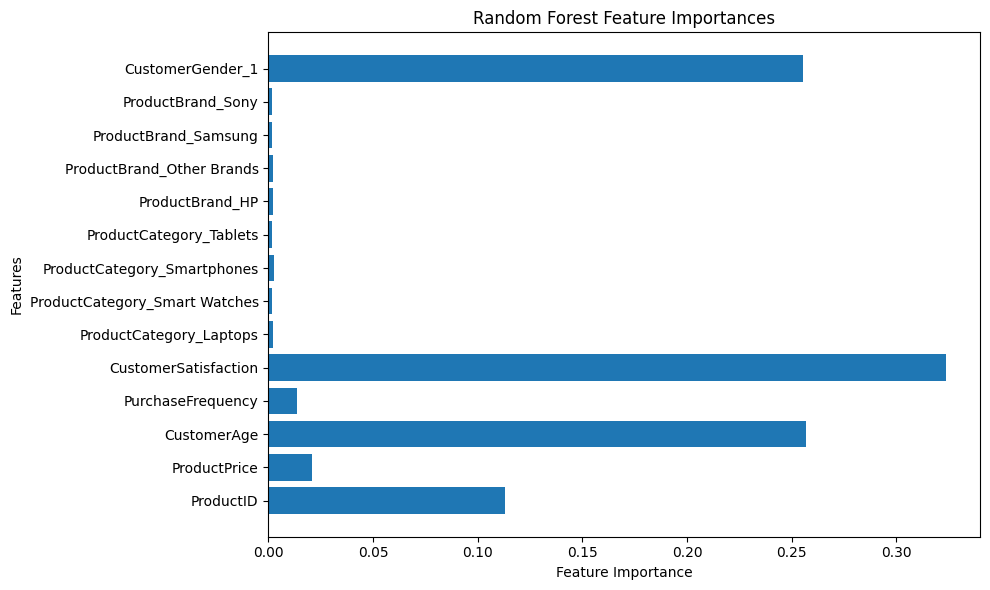

In [ ]:
import matplotlib.pyplot as plt
importances = model.feature_importances
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()
